In [6]:
# Importing the requirements
import tweepy 
import pandas as pd
import numpy as np
from IPython.display import display 
import matplotlib.pyplot as plt
import seaborn as sns 
from textblob import TextBlob
import re
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [7]:
# Credentials
consumer_key = "Your Key"
consumer_secret = "Your Key"

access_key = "Your Key"
access_secret = "Your Key"

In [8]:
#Getting authenticated 
def twitter_setup():
    auth=tweepy.OAuthHandler(consumer_key, consumer_secret)
    auth.set_access_token(access_key, access_secret)
    
    api = tweepy.API(auth)
    return api

In [9]:
# Twitter handle
screen_name="narendramodi"

def get_all_tweets(screen_name):
    
    # Authentication and access using keys:
    auth=tweepy.OAuthHandler(consumer_key, consumer_secret)
    auth.set_access_token(access_key, access_secret)
    
    # Return API with authentication:
    api=tweepy.API(auth)
    
    tweets=[]
    new_tweets=api.user_timeline(screen_name=screen_name, count=200)
    tweets.extend(new_tweets)
    
    oldest=tweets[-1].id-1
    
    while len(new_tweets)>0:
        print(f"Getting tweets before {oldest}")
        #all request will include oldest parameter to exclude the chances of the duplicates 
        new_tweets=api.user_timeline(screen_name=screen_name, count=200, max_id=oldest)
        tweets.extend(new_tweets)
        oldest=tweets[-1].id-1
        print(f"Number of Tweets have been downloaded so far: {len(tweets)}")
    
    return tweets

tweets=get_all_tweets(screen_name)
print("5 recent Tweets")
for tweet in tweets[:5]:
    print(tweet.text)
    print()

Getting tweets before 1386606161001078783
Number of Tweets have been downloaded so far: 400
Getting tweets before 1378383638744731651
Number of Tweets have been downloaded so far: 600
Getting tweets before 1372037155095113729
Number of Tweets have been downloaded so far: 800
Getting tweets before 1363812406577700865
Number of Tweets have been downloaded so far: 1000
Getting tweets before 1355815796560195583
Number of Tweets have been downloaded so far: 1200
Getting tweets before 1349227896393453569
Number of Tweets have been downloaded so far: 1400
Getting tweets before 1342089874220883967
Number of Tweets have been downloaded so far: 1600
Getting tweets before 1331866010140385279
Number of Tweets have been downloaded so far: 1800
Getting tweets before 1324391514273849343
Number of Tweets have been downloaded so far: 2000
Getting tweets before 1319166160340856831
Number of Tweets have been downloaded so far: 2200
Getting tweets before 1310148416974929921
Number of Tweets have been down

In [10]:
# Shaping the data
data=pd.DataFrame(data=[tweet.text for tweet in tweets], columns=['Tweets'])
display(data.head(10))

,Tweets
0,India’s Aspirational Districts Programme aims ...
1,Dr. Siddalingaiah will be remembered for his p...
2,Dr. Ashok Panagariya made a mark as an outstan...
3,Prof Radhamohan Ji was deeply passionate about...
4,Anguished by the demise of Shri Buddhadeb Dasg...
5,"Shri Dingko Singh was a sporting superstar, an..."
6,Met the Leader of the Opposition in the West B...
7,"Congratulations to @iiscbangalore, @iitbombay ..."
8,Today's Cabinet decision augurs well for the R...
9,अन्नदाताओं के हित में आज केंद्रीय मंत्रिमंडल न...


In [11]:
# Components of the tweet
print(dir(tweets[0]))

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_api', '_json', 'author', 'contributors', 'coordinates', 'created_at', 'destroy', 'entities', 'favorite', 'favorite_count', 'favorited', 'geo', 'id', 'id_str', 'in_reply_to_screen_name', 'in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str', 'is_quote_status', 'lang', 'parse', 'parse_list', 'place', 'possibly_sensitive', 'retweet', 'retweet_count', 'retweeted', 'retweets', 'source', 'source_url', 'text', 'truncated', 'user']


In [12]:
#Adding relevant data to Panda DataFrame 
data['Length']=np.array([len(tweet.text) for tweet in tweets])
data['ID']=np.array([tweet.id for tweet in tweets])
data['Date']=np.array([tweet.created_at for tweet in tweets])
data['Source']=np.array([tweet.source for tweet in tweets])
data['Likes']=np.array([tweet.favorite_count for tweet in tweets])
data['RTs']=np.array([tweet.retweet_count for tweet in tweets])
display(data.head(10))

,Tweets,Length,ID,Date,Source,Likes,RTs
0,India’s Aspirational Districts Programme aims ...,144,1403548816524013568,2021-06-12 03:04:49,Twitter for iPhone,13664,2622
1,Dr. Siddalingaiah will be remembered for his p...,140,1403358223487225859,2021-06-11 14:27:28,Twitter for iPhone,28777,3669
2,Dr. Ashok Panagariya made a mark as an outstan...,140,1403329793756581891,2021-06-11 12:34:30,Twitter for iPhone,26232,3561
3,Prof Radhamohan Ji was deeply passionate about...,139,1403219496895086595,2021-06-11 05:16:13,Twitter for iPhone,31247,4165
4,Anguished by the demise of Shri Buddhadeb Dasg...,139,1402864065253232641,2021-06-10 05:43:51,Twitter for iPhone,27962,3911
5,"Shri Dingko Singh was a sporting superstar, an...",140,1402863841050988544,2021-06-10 05:42:58,Twitter for iPhone,26527,3747
6,Met the Leader of the Opposition in the West B...,119,1402628378314768387,2021-06-09 14:07:19,Twitter Web App,86172,9265
7,"Congratulations to @iiscbangalore, @iitbombay ...",140,1402628065474203650,2021-06-09 14:06:05,Twitter Web App,21621,3991
8,Today's Cabinet decision augurs well for the R...,140,1402627299774586892,2021-06-09 14:03:02,Twitter Web App,21320,3623
9,अन्नदाताओं के हित में आज केंद्रीय मंत्रिमंडल न...,139,1402626350247153665,2021-06-09 13:59:16,Twitter Web App,33290,6558


In [14]:
#Data Analysis 
mean=np.mean(data['Length'])
print(f"The Avaerage length of a tweet:  {mean}")

The Avaerage length of a tweet:  125.26553846153845


In [15]:
#Most liked and retweeted tweets
lik_max=np.max(data['Likes'])
rt_max=np.max(data['RTs'])

#Extract the index of max
fav=data[data.Likes==lik_max].index[0]
rt=data[data.RTs==rt_max].index[0]

#Print the result
print(f"The most liked tweet is: {data['Tweets'][fav]}")
print(f"Number of likes: {lik_max}")
print("------------------")
print()

#Print the most retweeted tweet
print(f"The most Retweeted tweet is: {data['Tweets'][rt]}")
print(f"Number of Retweets: {rt_max}")
print("------------------")
print()

The most liked tweet is: Sushant Singh Rajput...a bright young actor gone too soon. He excelled on TV and in films. His rise in the world of… https://t.co/1SGDaJ0TjW
Number of likes: 404581
------------------

The most Retweeted tweet is: राष्ट्ररक्षासमं पुण्यं,

राष्ट्ररक्षासमं व्रतम्,

राष्ट्ररक्षासमं यज्ञो,

दृष्टो नैव च नैव च।।

नभः स्पृशं दीप्तम्.… https://t.co/Fu0jpWheXv
Number of Retweets: 54846
------------------



In [16]:
#Plot between like and RTs
like=pd.Series(data=data['Likes'].values, index=data['Date'])
retweet=pd.Series(data=data['RTs'].values, index=data['Date'])

<AxesSubplot:xlabel='Date'>

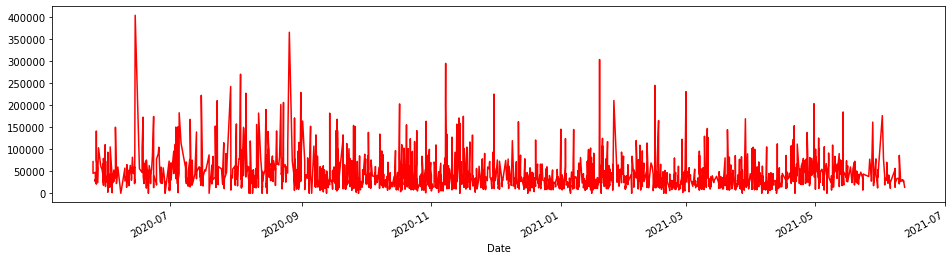

In [17]:
like.plot(figsize=(16,4), color='r')

<AxesSubplot:xlabel='Date'>

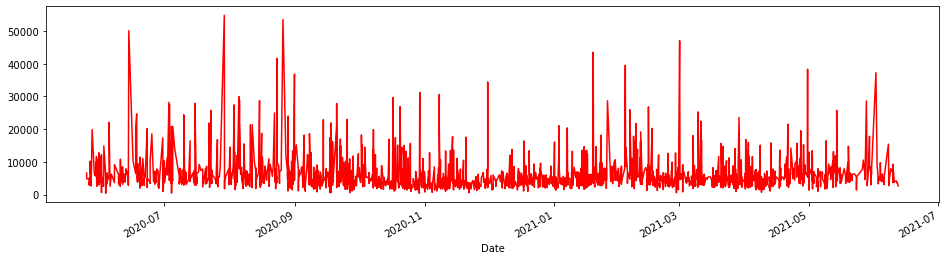

In [18]:
retweet.plot(figsize=(16,4), color='r')

<AxesSubplot:xlabel='Date'>

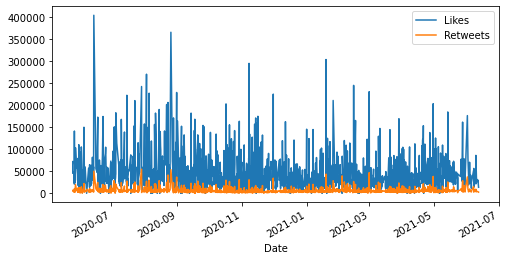

In [19]:
like.plot(figsize=(8,4), label="Likes", legend=True)
retweet.plot(figsize=(8,4), label="Retweets", legend=True)

In [20]:
#Before proceeding with any data analysis let's analyze whether we have null in dataset.
#We got False, stating that we have no null in DataFrame
data.isnull().any()

Tweets    False
Length    False
ID        False
Date      False
Source    False
Likes     False
RTs       False
dtype: bool

In [21]:
data.describe()

,Length,ID,Likes,RTs
count,3250.000000,3.250000e+03,3250.000000,3250.000000
mean,125.265538,1.333492e+18,30981.652923,4709.029538
std,27.064608,3.516441e+16,32165.545708,4418.741007
min,23.000000,1.264914e+18,0.000000,372.000000
25%,127.000000,1.306571e+18,12771.750000,2456.000000
50%,140.000000,1.330549e+18,21004.500000,3511.500000
75%,140.000000,1.363413e+18,36722.500000,5373.750000
max,148.000000,1.403549e+18,404581.000000,54846.000000


In [22]:
#I'm curious how many times Modi talks about Elections. Let's see. 
swachh_count = data.Tweets[data.Tweets.str.contains('election', flags=re.IGNORECASE)].count() 
print(f"PM Modi has tweeted about Election {swachh_count} times.")
print("--------------------------------")
print()
data.Tweets[data.Tweets.str.contains('election', flags=re.IGNORECASE)]

PM Modi has tweeted about Election 20 times.
--------------------------------



164     Congratulations to Thiru @mkstalin and @arival...
165     Gratitude to the people of Kerala who supporte...
166     I would like to congratulate Shri @vijayanpina...
183     Last phase of the 2021 West Bengal elections t...
201     The seventh phase of the West Bengal elections...
210     Addressing a virtual rally for the West Bengal...
251     Urging all those voting in today’s fifth phase...
311     As the 4th phase of the West Bengal elections ...
382     Elections are taking place in Assam, Kerala, P...
443     I’ve seen many elections but the 2021 Puducher...
492     Today, Phase 1 of the West Bengal Assembly ele...
493     The first phase of elections begin in Assam. U...
534     Thank you Goa for the continuous support to BJ...
791     Thank you Gujarat! \n\nResults of municipal el...
1715    Congratulations to Daw Aung San Suu Kyi &amp; ...
1831    Addressing an election rally in Saharsa. Here ...
1945    Congratulations to the people of Seychelles fo...
1946    Felici

Text(0.5, 1.0, 'Correlation between tweet features')

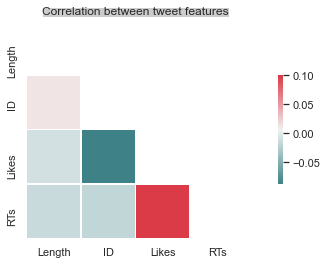

In [23]:
#Relationship between the Tweet and features
import seaborn as sns

sns.set(style="white")
# Compute the correlation matrix
corr = data.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 4))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(920, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.1,
            square=True, xticklabels=True, yticklabels=True,
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)
plt.title('Correlation between tweet features', bbox={'facecolor':'0.8', 'pad':0})

In [26]:
#Data cleaning for Tweet text analysis 
#Search for the text beginning with http or @ and then delete the proceeding text until we find whitespace 
#Also, remove &amp and white chracter trailing the last character 
data['Tweets_Cln']=data.Tweets.str.replace(r'http\S+', '').str.replace(r'@\S+', '').str.replace('&amp', '').str.rstrip()

#We can remove the Tweets that are retweets by deleting the tweets that have zero likes. 
#In Twitter data, retweets from users have zero likes

data=data[data.Likes!=0]

In [27]:
data.head(2)


,Tweets,Length,ID,Date,Source,Likes,RTs,Tweets_Cln
0,India’s Aspirational Districts Programme aims ...,144,1403548816524013568,2021-06-12 03:04:49,Twitter for iPhone,13664,2622,India’s Aspirational Districts Programme aims ...
1,Dr. Siddalingaiah will be remembered for his p...,140,1403358223487225859,2021-06-11 14:27:28,Twitter for iPhone,28777,3669,Dr. Siddalingaiah will be remembered for his p...


,Tweets,Length,ID,Date,Source,Likes,RTs,Tweets_Cln,sentiment
0,India’s Aspirational Districts Programme aims ...,144,1403548816524013568,2021-06-12 03:04:49,Twitter for iPhone,13664,2622,India’s Aspirational Districts Programme aims ...,0
1,Dr. Siddalingaiah will be remembered for his p...,140,1403358223487225859,2021-06-11 14:27:28,Twitter for iPhone,28777,3669,Dr. Siddalingaiah will be remembered for his p...,1


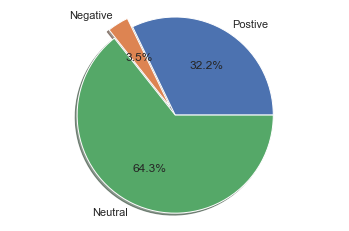

TypeError: object of type 'numpy.int32' has no len()

In [39]:
#Doing Sentiment analysis on the tweets

def analize_sentiment(tweet):
    analysis = TextBlob(tweet)
    if analysis.sentiment.polarity > 0:
        return 1
    elif analysis.sentiment.polarity == 0:
        return 0
    else:
        return -1
data['sentiment'] = np.array([ analize_sentiment(tweet) for tweet in data['Tweets_Cln']])
display(data.head(2))

positive=data.loc[data.sentiment==1,'Tweets'].count()
negative=data.loc[data.sentiment==-1,'Tweets'].count()
neutral=data.loc[data.sentiment==0,'Tweets'].count()

#Let's plot
labels='Postive', 'Negative', 'Neutral'
sizes=[positive, negative, neutral]
explode=(0, 0.1, 0)
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=0)
ax1.axis('equal') 
plt.show()

  Using cached wordcloud-1.8.1-cp38-cp38-win_amd64.whl (155 kB)


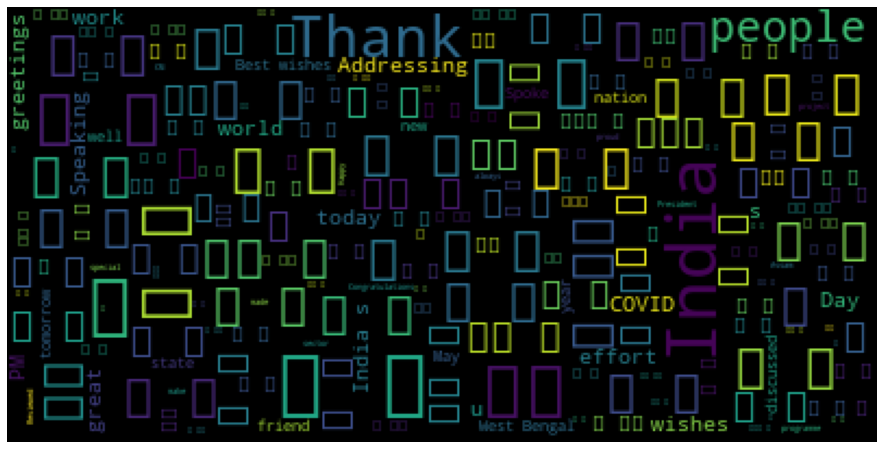

In [30]:
# Wordcloud 
!pip install wordcloud
from wordcloud import WordCloud
from wordcloud import STOPWORDS
from PIL import Image

stopwords = set(STOPWORDS)
stopwords.add("will")
stopwords.update(["say","said", "let", "now", "go", "Ji", "many", "Dear", "Shri", "watch"])
wordcloud_hc = WordCloud(max_font_size=40, relative_scaling=.5,stopwords=stopwords, background_color="black").generate(data['Tweets_Cln'].str.cat())
plt.figure(figsize=[16,8])
plt.imshow(wordcloud_hc)
plt.axis("off")
plt.show()



In [36]:
#Let's get word frequency 
import nltk
from nltk.corpus import stopwords 
stop_words = set(stopwords.words('english'))
stop_words.update(["I", "The","के", "की","को","में", "का", "और","है।", "से","in", "a", "ji", "पर", "shri","है", "लिए", "ji.",
                   "ने", "also", "towards"])

counts = {}
for text in data.Tweets_Cln:
        for word in text.split():
            if word.lower() in stop_words:
                continue
            else:
                counts[word.lower()]=counts.get(word.lower(),0)+1

lst=[]

for key,val in counts.items():
    newtup=(val, key)
    lst.append(newtup)

lst=sorted(lst, reverse=True)

count_num=[]
value=[]
for val, key in lst[:15]:
    count_num.append(key)
    value.append(val)
    print(key, val)
 
print("-------------------------------")
print()
print(f"Number of times he mentioned Ram: {counts['ram']}")
print(f"Number of times he mentioned Bengal: {counts['bengal']}")
print(f"Number of times he mentioned Bihar: {counts['bihar']}")


india 187
thank 144
एक 136
भारत 132
भी 131
देश 127
आज 127
है, 121
कि 117
people 114
बिहार 93
जी 92
greetings 88
wishes 87
addressing 85
-------------------------------

Number of times he mentioned Ram: 7
Number of times he mentioned Bengal: 27
Number of times he mentioned Bihar: 8


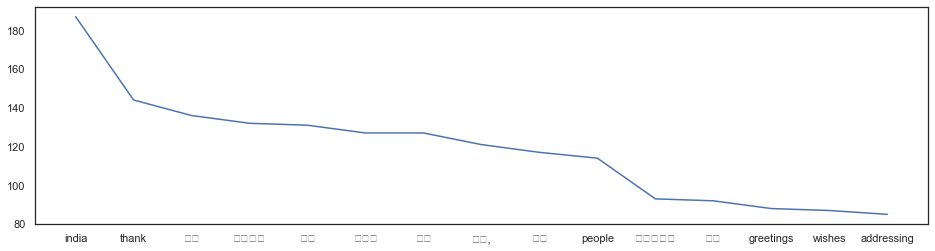

In [37]:
len(count_num)
plt.figure(figsize=[16,4])
plt.plot(count_num, value)